In [1]:
"""

Last Updated: 09/11/2021
------------------------

This notebook has two purposes - 1, to get a hang of rdkit functionalities. 2, to fin the best approach to identify 
the atom indices in the molecule that match the coarse-grained martini beads 

"""

'\n\nLast Updated: 09/11/2021\n------------------------\n\nThis notebook has two purposes - 1, to get a hang of rdkit functionalities. 2, to fin the best approach to identify \nthe atom indices in the molecule that match the coarse-grained martini beads \n\n'

In [3]:
from rdkit import Chem

# Library for main substructure annotation 
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from IPython.display import SVG
import io
from PIL import Image
import numpy as np
import rdkit
print(rdkit.__version__)

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

#IPythonConsole.drawOptions.addAtomIndices = True
#IPythonConsole.molSize = 300,300

2021.09.2


In [22]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdqueries

IPythonConsole.molSize = 250,250
import plotly.graph_objs as go

# Alignment libraries
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd

# Add Stero Annotations
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True

In [23]:
m2 = Chem.MolFromSmiles('C1CCC1')

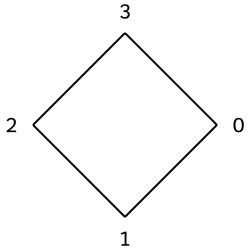

In [24]:
m2

In [25]:
m = Chem.MolFromSmiles('Cc1ccccc1')

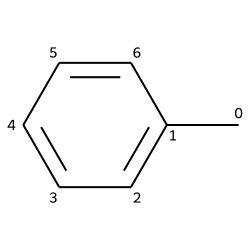

In [26]:
m

In [27]:
print(Chem.MolToMolBlock(m2)) 


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



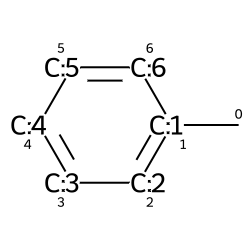

In [28]:
mol_with_atom_index(m)

In [29]:
m3 = Chem.AddHs(m)

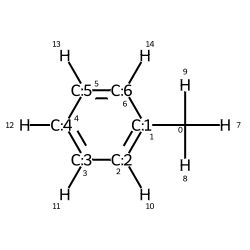

In [30]:
m3

In [31]:
AllChem.EmbedMolecule(m3,randomSeed=0xf00d)   # optional random seed for reproducibility)

0

In [32]:
print(Chem.MolToMolBlock(m3))    


     RDKit          3D

 15 15  0  0  0  0  0  0  0  0999 V2000
    2.2158    0.0324   -0.0218 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7287    0.0297   -0.0118 C   0  0  0  0  0  0  0  0  0  1  0  0
    0.0383   -1.1614    0.0667 C   0  0  0  0  0  0  0  0  0  2  0  0
   -1.3527   -1.1977    0.0782 C   0  0  0  0  0  0  0  0  0  3  0  0
   -2.0901   -0.0334    0.0108 C   0  0  0  0  0  0  0  0  0  4  0  0
   -1.3920    1.1548   -0.0676 C   0  0  0  0  0  0  0  0  0  5  0  0
   -0.0036    1.1972   -0.0794 C   0  0  0  0  0  0  0  0  0  6  0  0
    2.6349   -0.0844    1.0025 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5646   -0.8265   -0.6062 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5418    1.0131   -0.3925 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6086   -2.1021    0.1214 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8853   -2.1304    0.1396 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1787   -0.0848    0.0212 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9686    2.0588   -0

In [18]:
for bond in m3.GetBonds():
    print(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

0 1
1 2
2 3
3 4
4 5
5 6
6 1
0 7
0 8
0 9
2 10
3 11
4 12
5 13
6 14


In [19]:
 with Chem.SDMolSupplier('cdk2.sdf') as suppl:
        ms = [x for x in suppl if x is not None]

In [20]:
ms

In [33]:
for m in ms: tmp=AllChem.Compute2DCoords(m)

In [34]:
tmp


0

In [35]:
from rdkit.Chem import Draw
Draw.MolToFile(ms[0],'cdk2_mol1.o.png') 

In [ ]:
"""
Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, 
and bonds likewise can have a coloured outline applied. 

An obvious use is to show atoms and bonds that have matched a substructure query

----

Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, 
and bonds likewise can have a coloured outline applied. 

An obvious use is to show atoms and bonds that have matched a substructure query


"""

In [1]:
smi = 'c1cc(F)ccc1Cl'

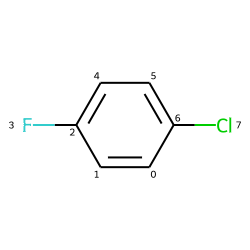

In [36]:
mol = Chem.MolFromSmiles(smi)
mol

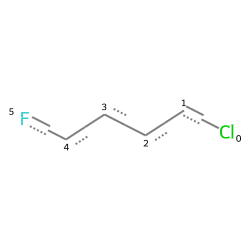

In [38]:
patt = Chem.MolFromSmarts('ClccccF')
patt

In [39]:
hit_ats = list(mol.GetSubstructMatch(patt))

In [40]:
hit_ats

[7, 6, 5, 4, 2, 3]

In [44]:
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

In [45]:
hit_bonds

[6, 5, 4, 3, 2]

In [46]:
d = rdMolDraw2D.MolDraw2DSVG(500, 500)

In [47]:
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,  highlightBonds=hit_bonds)

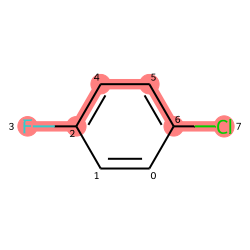

In [48]:
mol

In [49]:
# Trying to isolate only the beads that represent the 
m = Chem.MolFromSmiles('CCc1cccc2ccccc21')

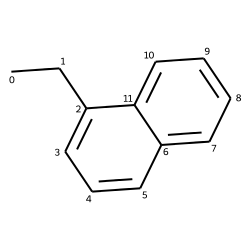

In [50]:
m

In [51]:
colours = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]

In [66]:
patt = Chem.MolFromSmarts('cccccc')

In [67]:
hit_ats = list(m.GetSubstructMatch(patt))

In [68]:
hit_ats

[2, 3, 4, 5, 6, 7]